In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import numpy as np
from MPNN_model import logpsi
import netket as nk
import flax
import json
from distances import dist_min_image
from stats import corr_2d_mapped, moving_stats, structure_factor_mapped, corr_2d_xy_mapped

In [2]:
N = 16
R_s = jnp.array([1.5,1.7,1.9,2.0,2.5,3.0,3.5,4.0,4.4,4.6,4.8, 5.0, 5.5])
energies = []
stds = []
acceptances = []

for r in R_s:

    data = json.load(open(f"log_files/int_bosons_2d_N=16_rs={r}_m=100_no_ri.log", 'rb'))

    Es = jnp.array(data['Energy']['Mean'])
    sigmas = jnp.array(data['Energy']['Sigma'])
    acceptance = jnp.array(data['acceptance']['value'])
    R_hat = jnp.array(data['Energy']['R_hat'])
    energies.append(Es)
    stds.append(sigmas)
    acceptances.append(acceptance)

energies = jnp.array(energies)
stds = jnp.array(stds)
acceptances = jnp.array(acceptances)

2023-06-05 11:54:37.941301: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
e_avg = []
std_avg = []
for i in range(len(R_s)):
    e, std = moving_stats(energies[i], 20)
    e_avg.append(e)
    std_avg.append(std)

e_avg = jnp.array(e_avg)
std_avg = jnp.array(std_avg)

In [4]:
gs_energy = jnp.mean(e_avg[:,-50:], axis = 1)
gs_std = jnp.mean(std_avg[:,-50:], axis = 1)

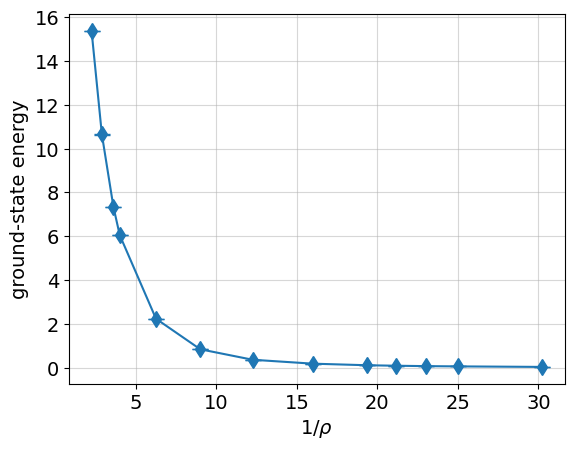

In [5]:
rho = 1 / R_s**2
plt.rcParams.update({'font.size' : 14, 'font.family': 'sans-serif', "savefig.dpi": 300, 'lines.linewidth': 1.5, 
                     'lines.color' :'k', "xtick.labelsize": 14, "ytick.labelsize": 14})
fig, ax = plt.subplots()
ax.errorbar(1 / rho, gs_energy, gs_std, marker='d', markersize = 8, capsize=6)
ax.set_xlabel(r"$1 / \rho$")
ax.set_ylabel("ground-state energy")
ax.grid(alpha=0.5)

In [8]:
nparticles = 16
L = 12
sdim = 2
points = 50
G = []
R = []
R_s = jnp.array([1.5,2.0,3.0,4.0,4.6,5.0,6.0])
a = 2/3**0.5
for rs in R_s:
  
  L = rs * nparticles**0.5
  
  samples = jnp.load(f'log_files/samples_N=16_rs={rs}_m=100_no_ri.npy')

  x = samples.reshape(-1,samples.shape[-1])
  x = x.reshape(-1,nparticles,sdim)

  gs, radii = corr_2d_mapped(x, L, L/(2*np.sqrt(a)), L/(2*np.sqrt(a)*points)) 
  g = jnp.mean(gs, axis = 0)
  G.append(g)
  R.append(jnp.array(radii))

In [10]:
rho = 1/R_s**2
rho

Array([0.44444444, 0.25      , 0.11111111, 0.0625    , 0.04725898,
       0.04      , 0.02777778], dtype=float64)

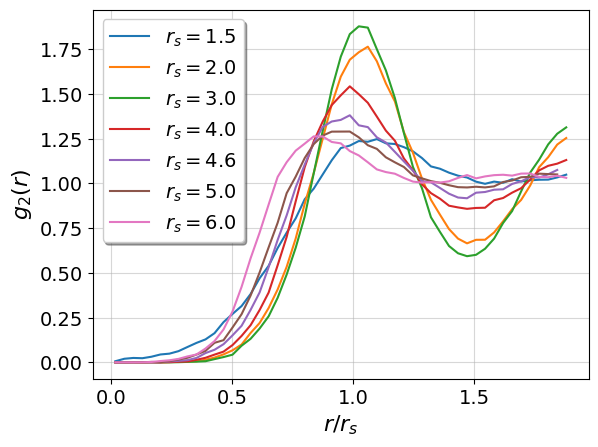

In [9]:
#labels = [r'$1.0$', '$1.1$', r'$2/\sqrt{3}$', r'$1.2$', r'$1.3$']
plt.rcParams.update({'font.size' : 14, 'font.family': 'sans-serif', "savefig.dpi": 300, 'lines.linewidth': 1.5, 
                     'lines.color' :'k', "xtick.labelsize": 14, "ytick.labelsize": 14})
for i in range(len(R_s)):
    plt.plot(R[i]/R_s[i], G[i], label = fr"$r_s=${R_s[i]}")
    #if i == len(A)-2:
    #    break
plt.xlabel(r"$r / r_s$", fontsize = 16)
plt.ylabel(r"$g_2(r)$", fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(frameon = True, shadow = True)

In [11]:
l = 12
sdim = 2
nparticles = 16
npoints = 140
R_s = jnp.array([1.5,3.0,3.5,5.0])
a = 2/3**0.5
G = []
Xs = []
Ys = [] 
for rs in R_s:
    
    l = rs * nparticles**0.5
    samples = jnp.load(f'log_files/samples_N=16_rs={rs}_m=100_no_ri.npy')

    x = samples.reshape(-1,samples.shape[-1])
    x = x.reshape(-1,nparticles,sdim)
    #print(x.shape)

    L = jnp.array([l*a**0.5, l/a**0.5])
    xedges = jnp.linspace(-L[0]/2, L[0]/2, npoints)
    yedges = jnp.linspace(-L[1]/2, L[1]/2, npoints)
    
    g, xs, ys = corr_2d_xy_mapped(x, L, xedges, yedges)

    print(g.shape)
    G.append(jnp.mean(g, axis = 0))
    Xs.append(xs)
    Ys.append(ys)

G = jnp.array(G)

(5008, 139, 139)
(5008, 139, 139)
(5008, 139, 139)
(5008, 139, 139)


/tmp/ipykernel_99768/3530492004.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = mlt.cm.get_cmap("bwr")


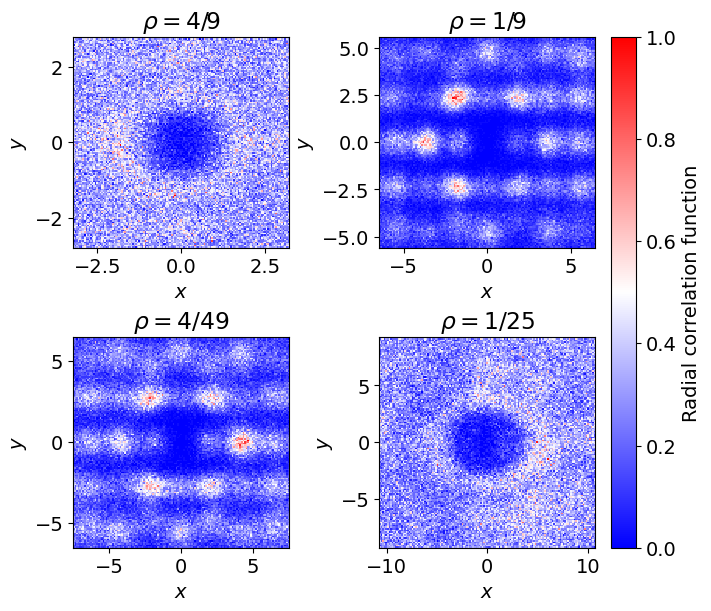

In [12]:
plt.rcParams.update({'font.size' : 14, 'font.family': 'sans-serif', "savefig.dpi": 300, 'lines.linewidth': 1.5, 
                     'lines.color' :'k', "xtick.labelsize": 14, "ytick.labelsize": 14})

import matplotlib as mlt

figs, axs = plt.subplots(2,2,figsize=(7,6),constrained_layout=True)
colormap = mlt.cm.get_cmap("bwr")
labels = [r"$4/9$", r"$1/9$", r"$4/49$", r"$1/25$"]
for i in range(2):
    for j in range(2):
        map = axs[i,j].pcolormesh(Xs[i*(i+1)+j],Ys[i*(i+1)+j],G[i*(i+1)+j], cmap = colormap)
        axs[i,j].set_title(fr"$\rho=$"+labels[i*(i+1)+j])
        axs[i,j].set_xlabel(r"$x$")
        axs[i,j].set_ylabel(r"$y$")
    
figs.colorbar(mlt.cm.ScalarMappable(norm=mlt.colors.Normalize(vmin=0, vmax=1.0), cmap="bwr"), ax = axs[:,1], label = "Radial correlation function")

In [13]:
sdim = 2
nparticles = 16
l = 12
Ls = []
R_s = jnp.array([1.5,3.0,3.5,5.0])
a = 2/3**0.5
S = []
n_max,dn = 10,1
for rs in R_s:
    samples = jnp.load(f'log_files/samples_N=16_rs={rs}_m=100_no_ri.npy')

    l = rs * nparticles**0.5
    L = (l*a**0.5,l/a**0.5)
    Ls.append(L)
    x = samples.reshape(-1,samples.shape[-1])
    x = x.reshape(-1,nparticles,sdim)

    s_factors, coords = structure_factor_mapped(x, L, n_max, dn)

    S.append(jnp.mean(s_factors, axis = 0))

x = jnp.arange(-n_max, n_max+dn, dn)
y = x.copy()
Ls = jnp.array(Ls)
avgS = jnp.array(S)
avgS = avgS.reshape(avgS.shape[0],-1,x.shape[0])
print(avgS.shape)

(16,)
(4, 21, 21)


/tmp/ipykernel_99768/2973199651.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = mlt.cm.get_cmap("bwr")


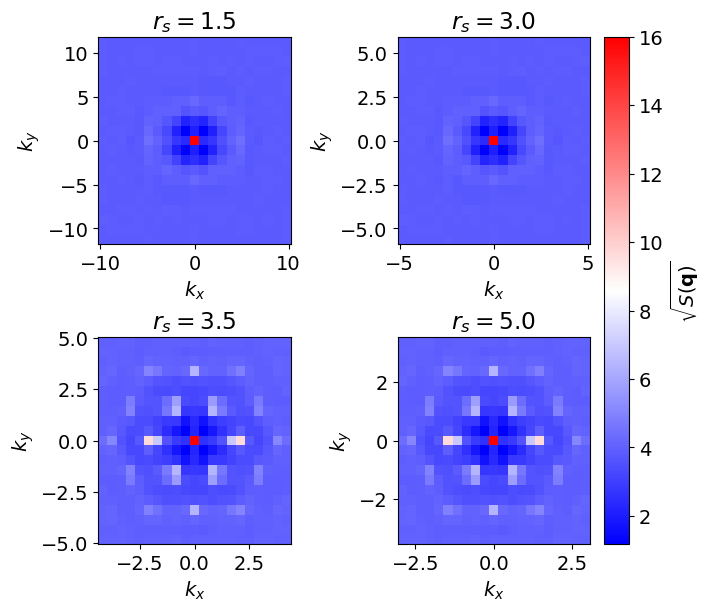

In [19]:
plt.rcParams.update({'font.size' : 14, 'font.family': 'sans-serif', "savefig.dpi": 300, 'lines.linewidth': 1.5, 
                     'lines.color' :'k', "xtick.labelsize": 14, "ytick.labelsize": 14})

import matplotlib as mlt

figs, axs = plt.subplots(2,2, figsize=(7,6),constrained_layout=True)
titles = [r"$1.5$",r"$3.0$",r"$3.5$",r"$5.0$"]

colormap = mlt.cm.get_cmap("bwr")

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):

        map = axs[i,j].pcolormesh(2*jnp.pi*x/Ls[i*(i+1)+j,0],2*jnp.pi*y/Ls[i*(i+1)+j,1],
        avgS[i,:,:]**0.5, cmap = colormap)#, vmin=0, vmax=1.0)
        axs[i,j].set_title(r"$r_s=$"+titles[i*(i+1)+j])
        axs[i,j].set_xlabel(r"$k_x$") 
        axs[i,j].set_ylabel(r"$k_y$")
    
figs.colorbar(map, ax = axs[:,1], label = r"$\sqrt{S({\bf q})}$")
#figs.colorbar(mlt.cm.ScalarMappable(norm=mlt.colors.Normalize(vmin=0, vmax=1.0), cmap="bwr"), ax = axs[:,1], label = "Structure factor")